In [2]:
# svm_mnist_lda_compare.py
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from torchvision import datasets, transforms

# ----------------------------
# 字体设置（Windows中文字体）
# ----------------------------
plt.rcParams["font.family"] = ["SimSun", "SimHei", "Microsoft YaHei"]
plt.rcParams['axes.unicode_minus'] = False

# ========================
# 1. 数据加载与预处理
# ========================
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

X_train = train_dataset.data.numpy().reshape(-1, 28*28) / 255.0
y_train = train_dataset.targets.numpy()
X_test = test_dataset.data.numpy().reshape(-1, 28*28) / 255.0
y_test = test_dataset.targets.numpy()

# 限制训练样本数量，加快训练
n_samples = 60000
X_train, y_train = X_train[:n_samples], y_train[:n_samples]

# ========================
# 2. 定义函数：训练 + 评估 + 输出
# ========================
def train_and_evaluate(X_train, y_train, X_test, y_test, desc="原始784维"):
    print(f"\n{'='*60}")
    print(f"正在训练 SVM 模型 ({desc})...")
    clf = svm.SVC(kernel='rbf', gamma=0.05)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    print(f"{desc} 测试集准确率：{acc*100:.2f}%")
    return acc, y_pred


In [3]:
# ========================
# 3. 原始784维训练
# ========================
acc_raw, y_pred_raw = train_and_evaluate(X_train, y_train, X_test, y_test, "原始784维")

# ========================
# 4. LDA降维（最多9维）
# ========================
lda_9d = LDA(n_components=9)
X_train_9d = lda_9d.fit_transform(X_train, y_train)
X_test_9d = lda_9d.transform(X_test)
acc_9d, y_pred_9d = train_and_evaluate(X_train_9d, y_train, X_test_9d, y_test, "LDA降至9维")

lda_3d = LDA(n_components=3)
X_train_3d = lda_3d.fit_transform(X_train, y_train)
X_test_3d = lda_3d.transform(X_test)
acc_3d, y_pred_3d = train_and_evaluate(X_train_3d, y_train, X_test_3d, y_test, "LDA降至3维")

lda_2d = LDA(n_components=2)
X_train_2d = lda_2d.fit_transform(X_train, y_train)
X_test_2d = lda_2d.transform(X_test)
acc_2d, y_pred_2d = train_and_evaluate(X_train_2d, y_train, X_test_2d, y_test, "LDA降至2维")


正在训练 SVM 模型 (原始784维)...
原始784维 测试集准确率：98.26%

正在训练 SVM 模型 (LDA降至9维)...
LDA降至9维 测试集准确率：92.20%

正在训练 SVM 模型 (LDA降至3维)...
LDA降至3维 测试集准确率：74.86%

正在训练 SVM 模型 (LDA降至2维)...
LDA降至2维 测试集准确率：57.40%


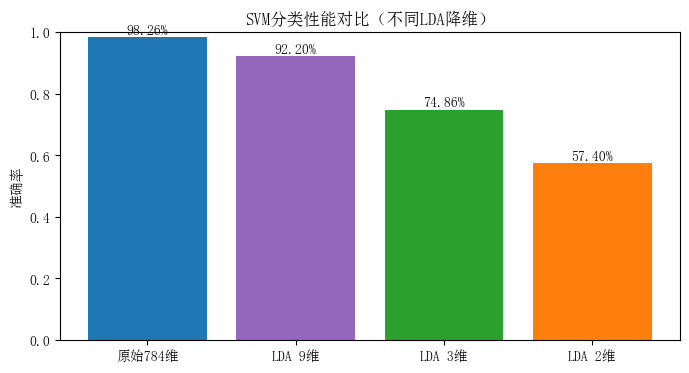

In [6]:
# ========================
# 5. 可视化结果对比
# ========================
plt.figure(figsize=(8, 4))
methods = ["原始784维", "LDA 9维", "LDA 3维", "LDA 2维"]
accuracies = [acc_raw, acc_9d, acc_3d, acc_2d]
plt.bar(methods, accuracies, color=["#1f77b4", "#9467bd", "#2ca02c", "#ff7f0e"])
plt.title("SVM分类性能对比（不同LDA降维）")
plt.ylabel("准确率")
plt.ylim(0, 1)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v*100:.2f}%", ha='center', fontsize=10)
plt.show()

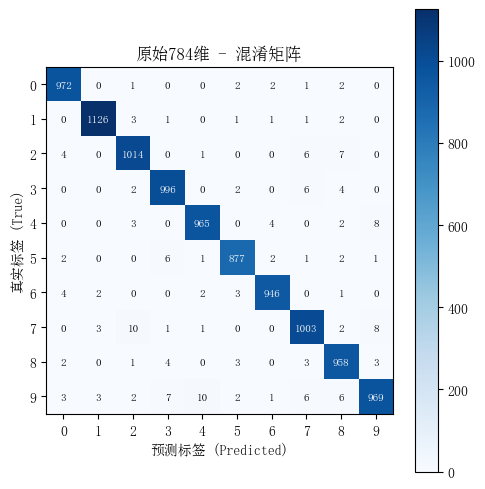

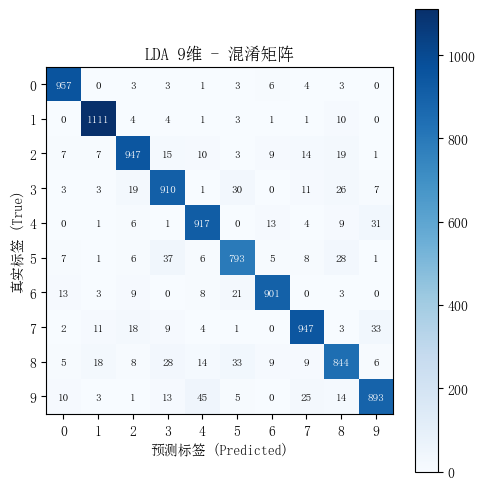

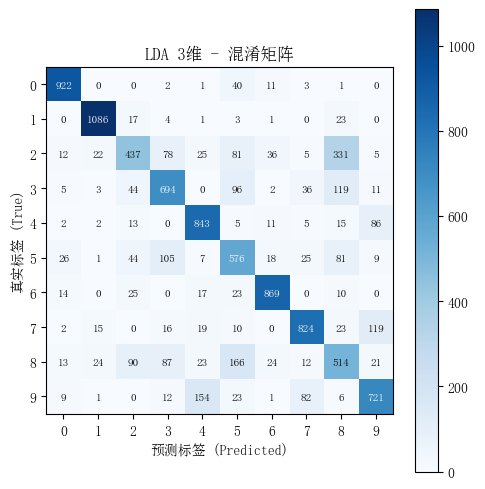

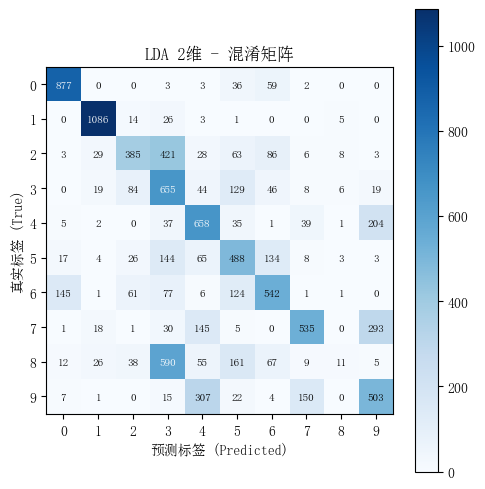

In [7]:
# ========================
# 6. 混淆矩阵绘制函数
# ========================
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,5))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    plt.xlabel("预测标签 (Predicted)")
    plt.ylabel("真实标签 (True)")
    tick_marks = np.arange(10)
    plt.xticks(tick_marks, tick_marks)
    plt.yticks(tick_marks, tick_marks)
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black",
                     fontsize=8)
    plt.tight_layout()
    plt.show()

# ========================
# 7. 显示各版本混淆矩阵
# ========================
plot_confusion_matrix(y_test, y_pred_raw, "原始784维 - 混淆矩阵")
plot_confusion_matrix(y_test, y_pred_9d,  "LDA 9维 - 混淆矩阵")
plot_confusion_matrix(y_test, y_pred_3d,  "LDA 3维 - 混淆矩阵")
plot_confusion_matrix(y_test, y_pred_2d,  "LDA 2维 - 混淆矩阵")